<a href="https://colab.research.google.com/github/JulianMejia6/IA_2025/blob/main/arbol_de_decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AGENDA
1. Objetivo de estudio
2. Exploración de datos EDA
3. Limpieza de datos
4. Entrenar el modelo (Árbol de desición)
5. Evaluar el modelo

In [1]:
#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor # Uncommented this line

In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos.head

<bound method NDFrame.head of      Unnamed: 0    X     TV  Radio  Newspaper         Web  Sales
0             1    1  230.1   37.8       69.2  306.634752   22.1
1             2    2   44.5   39.3       45.1  302.653070   10.4
2             3    3   17.2   45.9       69.3   49.498908    9.3
3             4    4  151.5   41.3       58.5  257.816893   18.5
4             5    5  180.8   10.8       58.4  195.660076   12.9
..          ...  ...    ...    ...        ...         ...    ...
195         196  196   38.2    3.7       13.8  248.841073    7.6
196         197  197   94.2    4.9        8.1  118.041856    9.7
197         198  198  177.0    9.3        6.4  213.274671   12.8
198         199  199  283.6   42.0       66.2  237.498063   25.5
199         200  200  232.1    8.6        8.7  151.990733   13.4

[200 rows x 7 columns]>

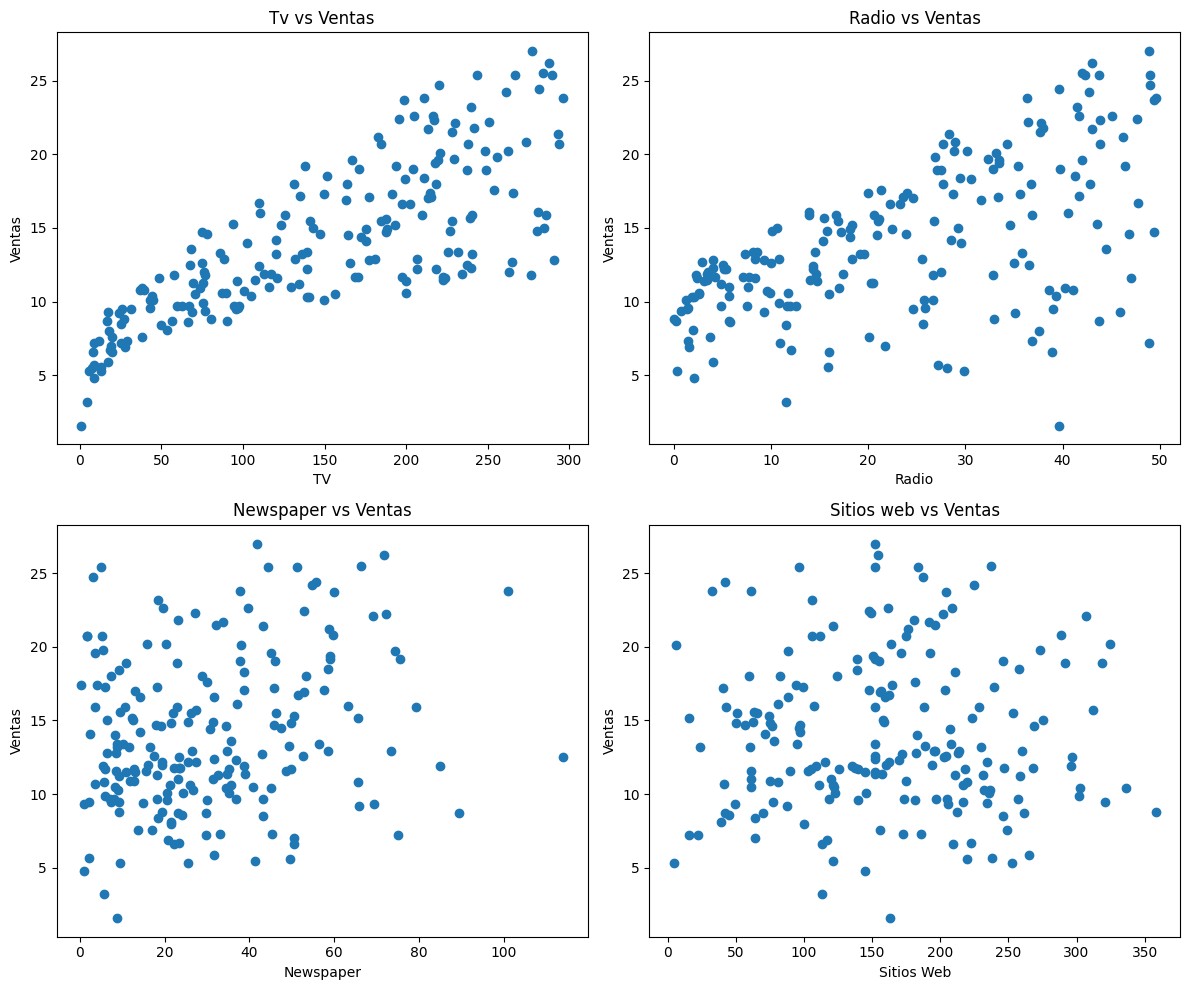

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))

axes[0,0].scatter(datos["TV"],datos["Sales"])
axes[0,0].set_xlabel("TV")
axes[0,0].set_ylabel("Ventas")
axes[0,0].set_title("Tv vs Ventas")

axes[0,1].scatter(datos["Radio"],datos["Sales"])
axes[0,1].set_xlabel("Radio")
axes[0,1].set_ylabel("Ventas")
axes[0,1].set_title("Radio vs Ventas")

axes[1,0].scatter(datos["Newspaper"],datos["Sales"])
axes[1,0].set_xlabel("Newspaper")
axes[1,0].set_ylabel("Ventas")
axes[1,0].set_title("Newspaper vs Ventas")

axes[1,1].scatter(datos["Web"],datos["Sales"])
axes[1,1].set_xlabel("Sitios Web")
axes[1,1].set_ylabel("Ventas")
axes[1,1].set_title("Sitios web vs Ventas")

plt.tight_layout()
plt.show()

2. Exploración de datos - EDA

In [ ]:
print("Observaciones y variables :", datos.shape)

Observaciones y variables : (200, 7)


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


Se describen como variables independientes TV, Radio, Newspaper y Web y como variable dependiente Sales.

Las varaibles independientes son:
* TV: Costos de publicidad en TV (miles de dólares).
* Radio: Costos de publicidad invertidos en medios de difusión radio (miles de dólares).
* Web: costos publicitarios en herramientas digitales (miles de dólares).

In [ ]:
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


In [ ]:
datos=datos[["TV","Radio","Newspaper","Web","Sales"]]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


##4. Datos de entrenamiento y datos de validación (Entrenamiento del modelo)
Se empleará la semilla 1289 (random_state=2022)
Los datos se distribuirán de la siguiente manera:
* 70% para entrenamiento
* 30% para validación del modelo

In [ ]:
X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(datos.drop(columns="Sales"),datos["Sales"],train_size=0.7,random_state=1289)

In [ ]:
print("Estructura de datos de entrenamiento: ",X_entrenamiento.shape)

(140, 4)

##4. MODELANDO EL ARBOL DE DESICION

La clase DecisionTreeRegressor del módulo sklearn.tree tiene los siguientes parametros:
* max_deph: profundidad máxima que puede alcanzar el arbol.
* min_samples_split: numero minimo de observaciones que debe detener el nodo para que pueda dividirse. Si es un valor decimal se interpreta como la fracción total de obeservaciónes de entrenamiento ceil(min_samples_split * n_samples)


In [ ]:
modelo_ar=DecisionTreeRegressor(max_depth=3,random_state=2022)

In [ ]:
modelo_ar.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeRegressor(max_depth=3, random_state=2022)

In [ ]:
print(f"Profundidad del arbol: {modelo_ar.get_depth()}")
print(f"Numero de nodos terminales: {modelo_ar.get_n_leaves()}")

Profundidad del arbol: 3
Numero de nodos terminales: 8


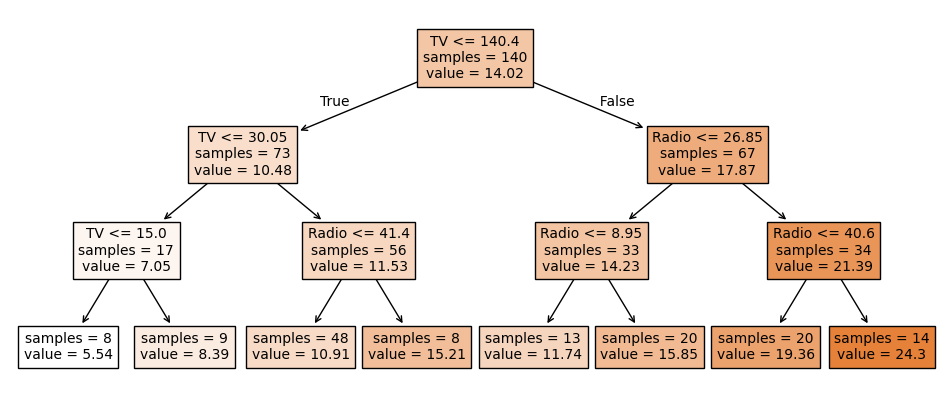

In [ ]:
fig,ax=plt.subplots(figsize=(12,5))
plot=plot_tree(decision_tree=modelo_ar,feature_names=datos.drop(columns="Sales").columns,filled=True,impurity=False,fontsize=10,precision=2,ax=ax)

In [ ]:
texto_modelo=export_text(
    decision_tree=modelo_ar,
    feature_names=list(datos.drop(columns="Sales").columns)
)
print(texto_modelo)

|--- TV <= 140.40
|   |--- TV <= 30.05
|   |   |--- TV <= 15.00
|   |   |   |--- value: [5.54]
|   |   |--- TV >  15.00
|   |   |   |--- value: [8.39]
|   |--- TV >  30.05
|   |   |--- Radio <= 41.40
|   |   |   |--- value: [10.91]
|   |   |--- Radio >  41.40
|   |   |   |--- value: [15.21]
|--- TV >  140.40
|   |--- Radio <= 26.85
|   |   |--- Radio <= 8.95
|   |   |   |--- value: [11.74]
|   |   |--- Radio >  8.95
|   |   |   |--- value: [15.85]
|   |--- Radio >  26.85
|   |   |--- Radio <= 40.60
|   |   |   |--- value: [19.36]
|   |   |--- Radio >  40.60
|   |   |   |--- value: [24.30]



##4.3 Predicciones
La importancia de cada predictor en el modelo se calcula com ola reducción total (normalizada) en el criterio de división. En este caso, el mse que consigue el predictor en las divisiones en las que participa. Si un predictor no se ha seleccionado en ninguna división, no se incluye en el modelo y su importancia es 0

In [ ]:
importancia_predictores=pd.DataFrame(
    {"predictor": datos.drop(columns="Sales").columns,
     "importancia": modelo_ar.feature_importances_}
)

In [ ]:
importancia_predictores.sort_values(by="importancia",ascending=False)

,predictor,importancia
0,TV,0.624932
1,Radio,0.375068
2,Newspaper,0.000000
3,Web,0.000000


In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
from graphviz import Source
from IPython.display import Image, display
import numpy as np
import pandas as pd

In [4]:
print(f"Features name - ", iris.feature_names)
print(iris.target)
print(f"Flor setosa:", iris.data[0])
print(f"Flor versicolor: {iris.data[50]}")
print(f"Flor virginica: {iris.data[100]}")

Features name -  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Flor setosa: [5.1 3.5 1.4 0.2]
Flor versicolor: [7.  3.2 4.7 1.4]
Flor virginica: [6.3 3.3 6.  2.5]


In [5]:
test_indices = [0,1,50,51,100,101]

train_tangent = np.delete(iris.target, test_indices) #Entrenando con 144 datos
train_data = np.delete(iris.data, test_indices, axis=0)

test_target = iris.target[test_indices] #probando el modelo con 6 datos
test_data = iris.data[test_indices]

In [6]:
dtClassifier=tree.DecisionTreeClassifier(random_state=2022)#Crear el modelo
dtClassifier.fit(train_data, train_tangent) #Entrenar el modelo

DecisionTreeClassifier(random_state=2022)

In [7]:
print("********Resultados********")
for p in range(len(test_indices)):
  print(f"Test Row {test_indices[p]} pertenece a la clase {test_target[p]}")

********Resultados********
Test Row 0 pertenece a la clase 0
Test Row 1 pertenece a la clase 0
Test Row 50 pertenece a la clase 1
Test Row 51 pertenece a la clase 1
Test Row 100 pertenece a la clase 2
Test Row 101 pertenece a la clase 2


In [8]:
predicted_target=dtClassifier.predict(test_data)
print("********Resultados********")
for p in range(len(test_indices)):
  print(f"Test Row {test_indices[p]} pertenece a la clase {predicted_target[p]}")

********Resultados********
Test Row 0 pertenece a la clase 0
Test Row 1 pertenece a la clase 0
Test Row 50 pertenece a la clase 1
Test Row 51 pertenece a la clase 1
Test Row 100 pertenece a la clase 2
Test Row 101 pertenece a la clase 2


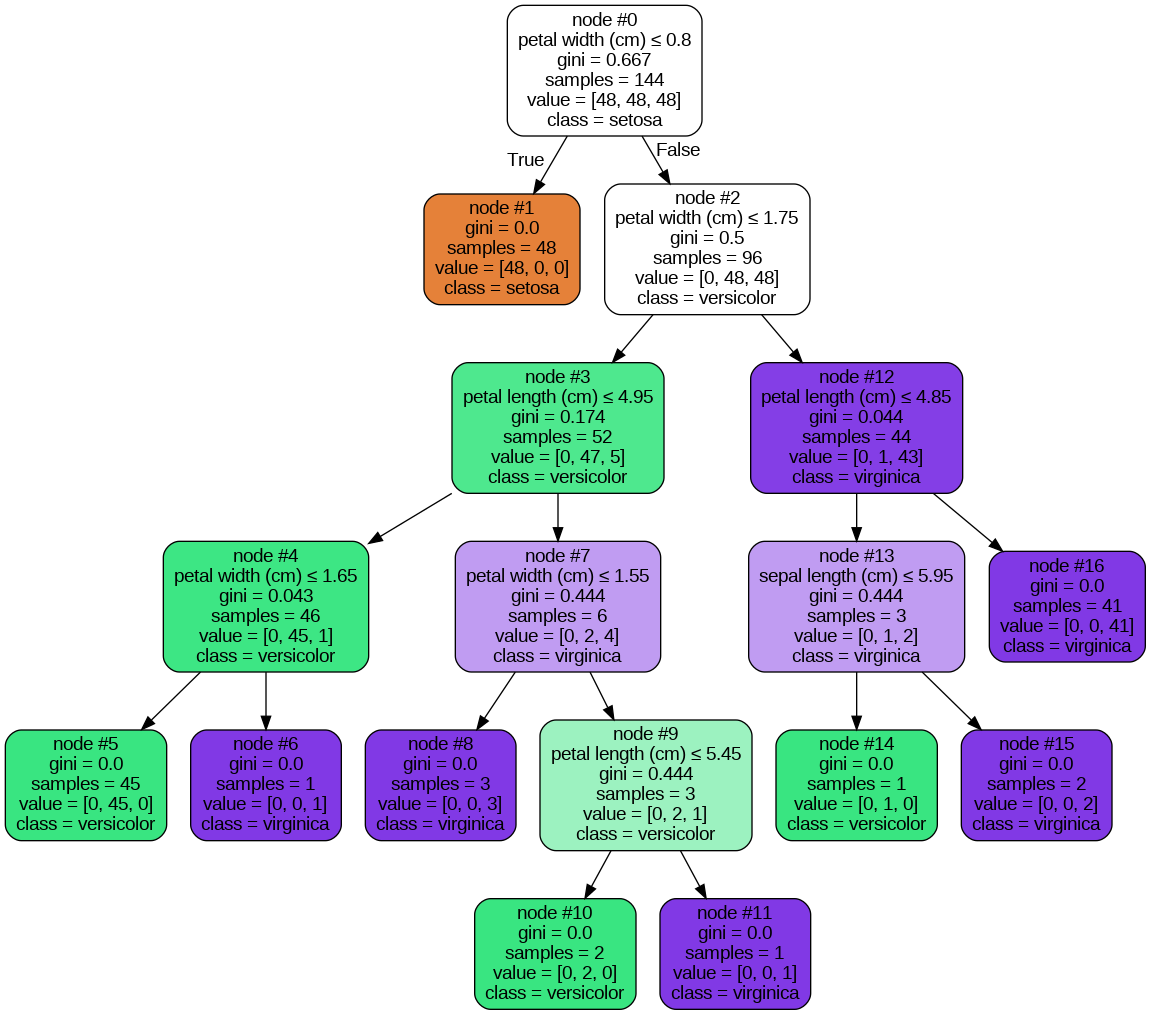

In [9]:
graph=Source(tree.export_graphviz(dtClassifier, out_file = None,
                                 feature_names = iris.feature_names,
                                 class_names = iris.target_names,
                                 filled=True, rounded =True, node_ids =True,
                                 special_characters=True))
graph.format="png"
graph.render("dtree_render", view=False)

display(Image(filename='dtree_render.png'))

In [12]:
iris2=pd.DataFrame(data=np.c_[iris["data"],iris["target"]], columns = iris["feature_names"]+["target"])
iris2.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2.0
4,5.0,3.6,1.4,0.2,0.0
110,6.5,3.2,5.1,2.0,2.0
93,5.0,2.3,3.3,1.0,1.0
100,6.3,3.3,6.0,2.5,2.0


In [13]:
print(f"Tamaño del dataframe: {iris2.shape}")

Tamaño del dataframe: (150, 5)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(iris2.drop(columns="target"),iris2["target"],train_size=0.7,random_state=1289)

In [18]:
modelo_flor=DecisionTreeRegressor(random_state=2022)

In [21]:
modelo_flor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=2022)

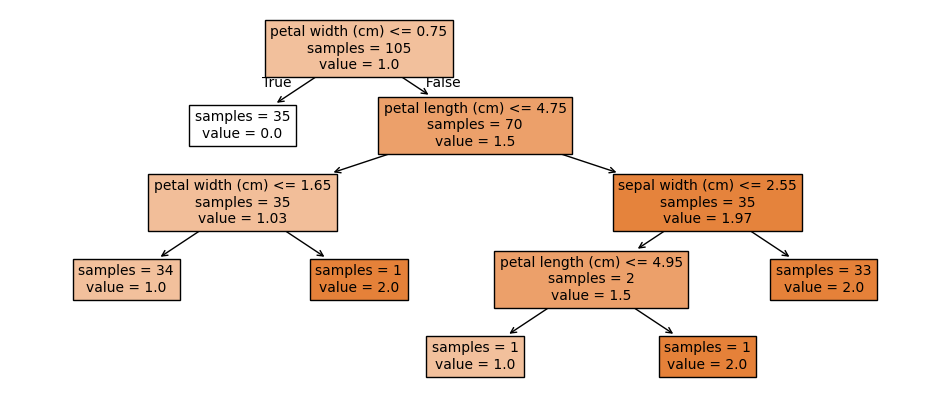

In [25]:
fig,ax=plt.subplots(figsize=(12,5))
plot=plot_tree(
    decision_tree=modelo_flor,
    feature_names=iris2.drop(columns=["target"]).columns,
    filled=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax
)

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [37]:
pima = pd.read_csv(path + "/diabetes.csv")
print(f"Features: {list(pima.columns)}")
print(f"First 5 rows of data:\n{pima.head()}")

Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
First 5 rows of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [38]:
train_data, test_data = train_test_split(pima, test_size=0.3, random_state=2022)

In [39]:
train_target = train_data["Outcome"]
test_target = test_data["Outcome"]

# Drop target variable for model training
train_data = train_data.drop(columns=["Outcome"])
test_data = test_data.drop(columns=["Outcome"])

# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=2022)
dt_classifier.fit(train_data, train_target)

DecisionTreeClassifier(random_state=2022)

In [40]:
print("******** Model Results ********")
for p in range(len(test_data)):
    print(f"Test Row {test_data.iloc[p].name} belongs to class {test_target.iloc[p]}")

predicted_target = dt_classifier.predict(test_data)
print("******** Predicted Results ********")
for p in range(len(test_data)):
    print(f"Test Row {test_data.iloc[p].name} predicted to belong to class {predicted_target[p]}")

******** Model Results ********
Test Row 223 belongs to class 0
Test Row 285 belongs to class 0
Test Row 350 belongs to class 0
Test Row 363 belongs to class 1
Test Row 551 belongs to class 0
Test Row 395 belongs to class 0
Test Row 233 belongs to class 0
Test Row 666 belongs to class 1
Test Row 758 belongs to class 0
Test Row 162 belongs to class 0
Test Row 194 belongs to class 0
Test Row 377 belongs to class 0
Test Row 226 belongs to class 0
Test Row 385 belongs to class 0
Test Row 216 belongs to class 1
Test Row 140 belongs to class 0
Test Row 687 belongs to class 0
Test Row 520 belongs to class 0
Test Row 721 belongs to class 0
Test Row 185 belongs to class 1
Test Row 651 belongs to class 0
Test Row 619 belongs to class 1
Test Row 750 belongs to class 1
Test Row 656 belongs to class 0
Test Row 245 belongs to class 1
Test Row 380 belongs to class 0
Test Row 664 belongs to class 1
Test Row 50 belongs to class 0
Test Row 275 belongs to class 0
Test Row 221 belongs to class 1
Test Row 

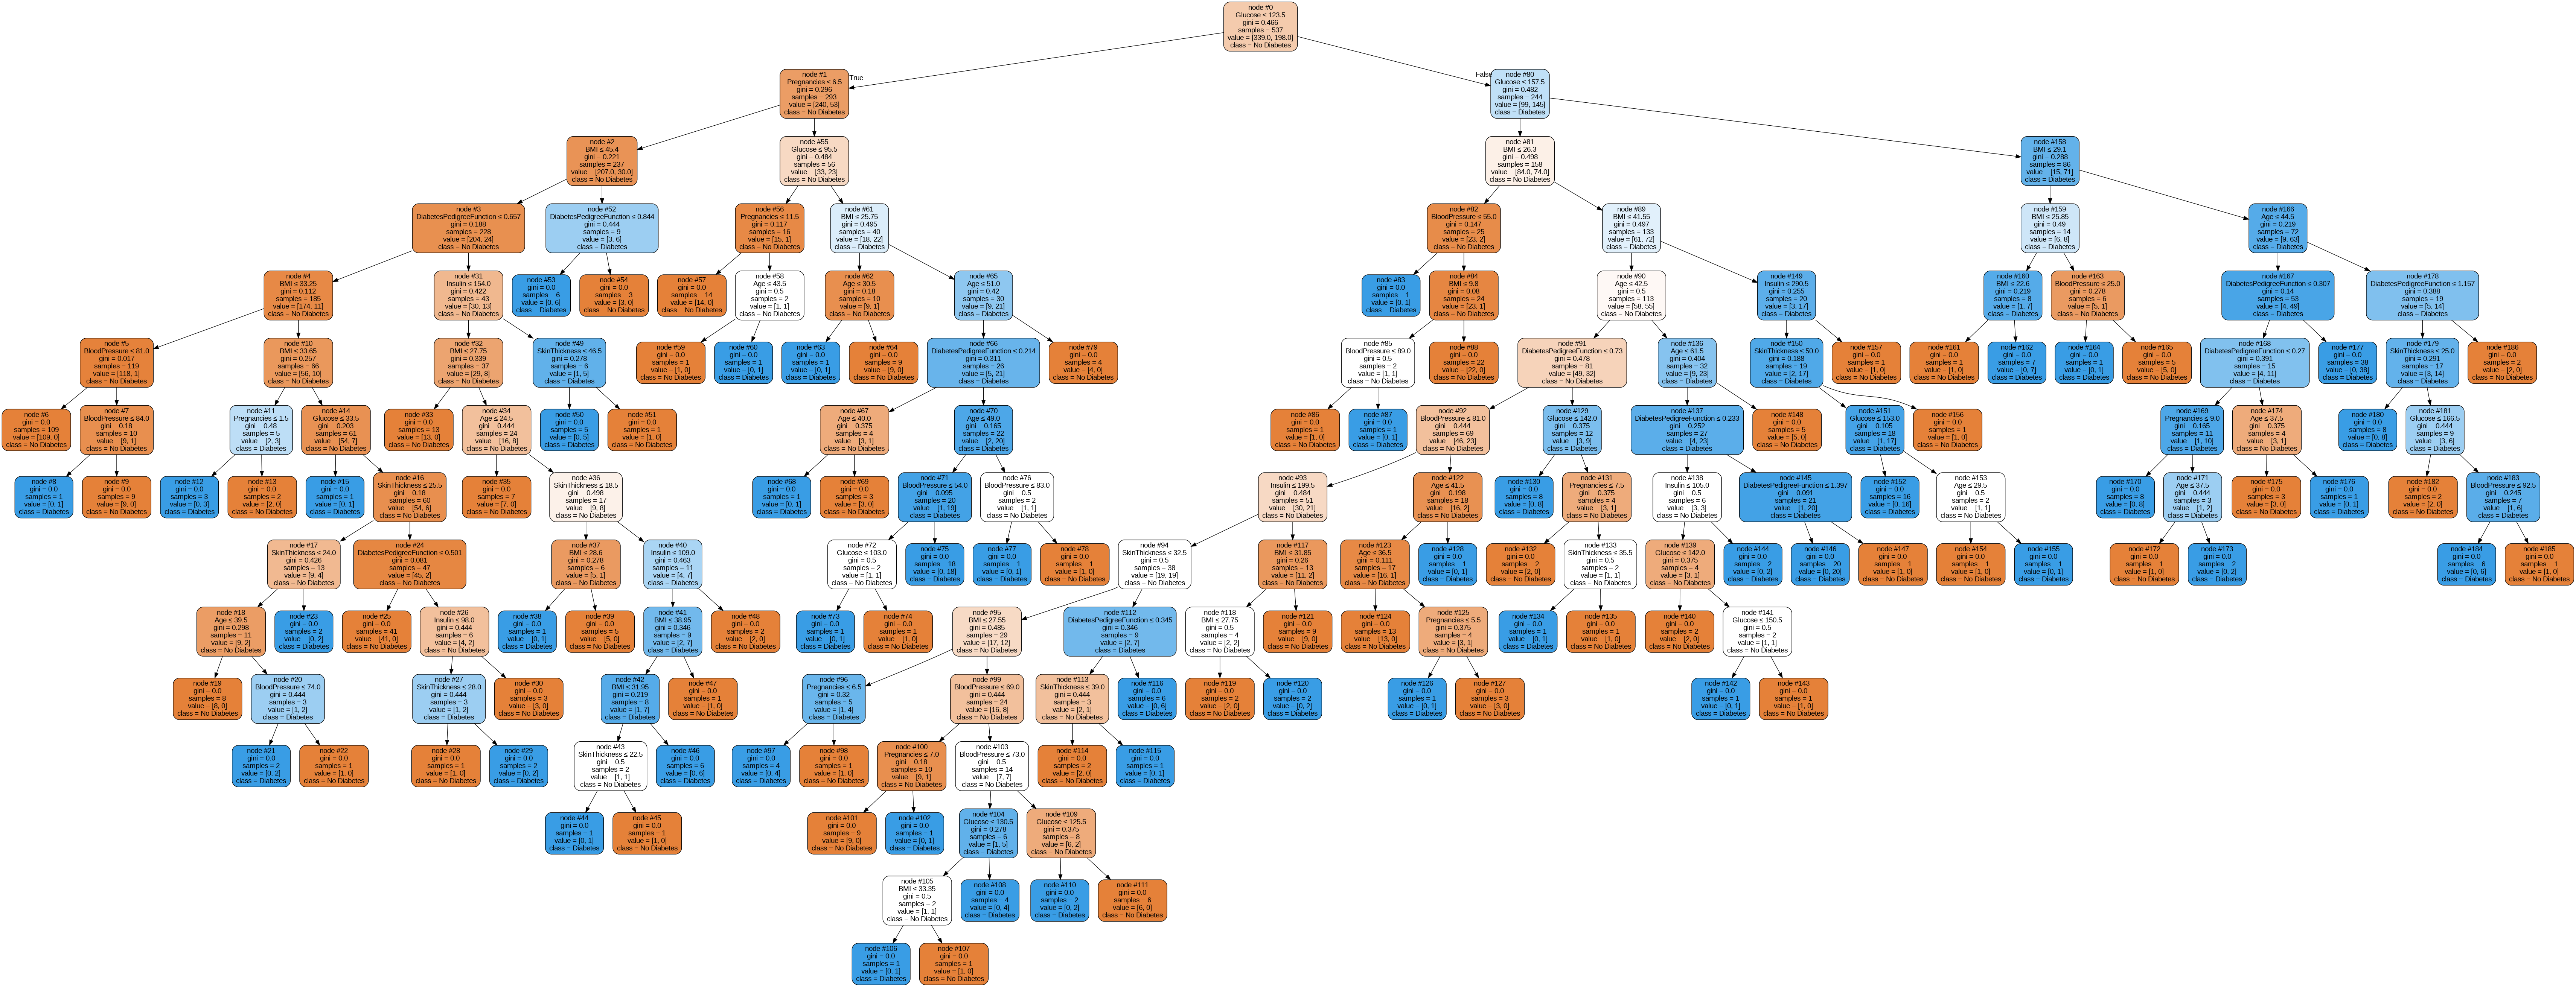

In [44]:
graph = Source(tree.export_graphviz(dt_classifier, out_file=None,
                                    feature_names=train_data.columns,
                                    class_names=["No Diabetes", "Diabetes"],
                                    filled=True, rounded=True, node_ids=True,
                                    special_characters=True))
graph.format = "png"
graph.render("diabetes_tree", view=True)
display(Image(filename='diabetes_tree.png'))

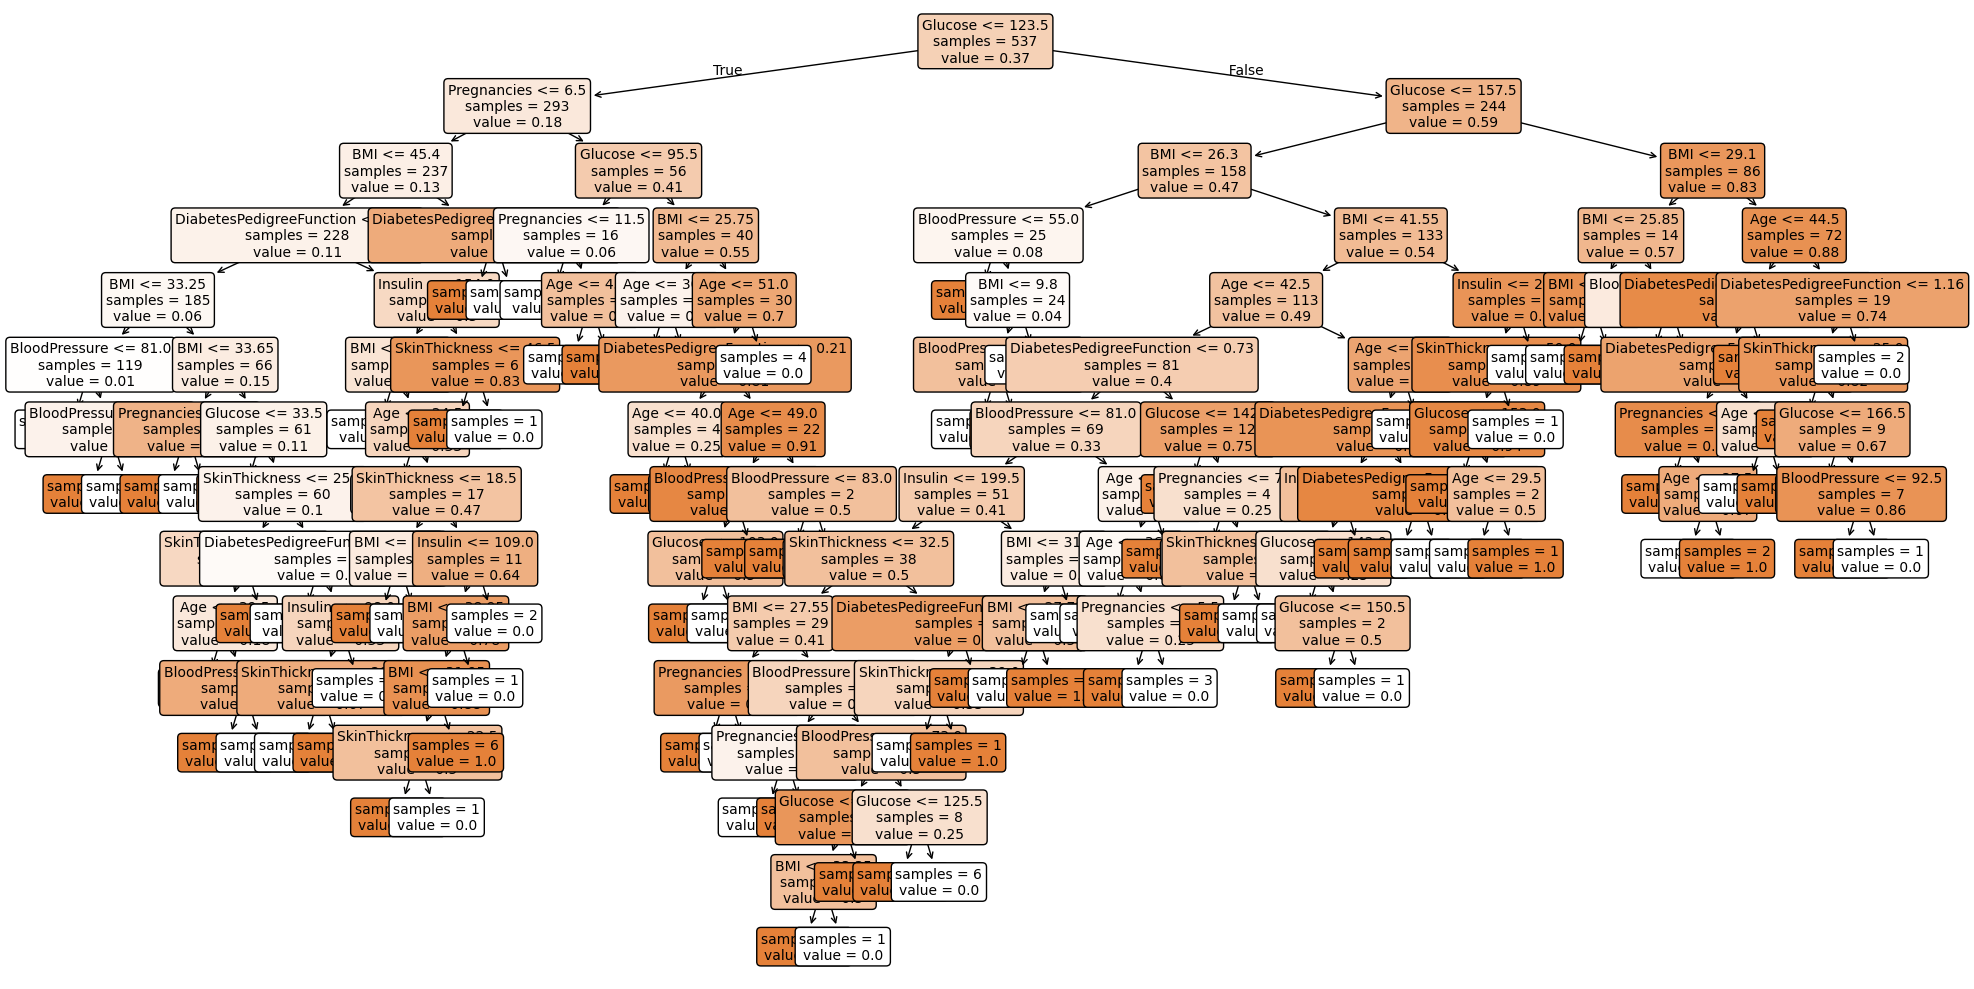

In [46]:
modelo_flor = DecisionTreeRegressor(random_state=2022)
modelo_flor.fit(train_data, train_target)


fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    decision_tree=modelo_flor,
    feature_names=train_data.columns,
    filled=True,
    impurity=False,
    fontsize=10,
    precision=2,
    ax=ax,
    proportion=False,
    rounded=True
)

plt.tight_layout()
plt.show()